In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import networkx as nx
from dowhy import CausalModel

In [15]:
data = pd.read_excel("paneldata_wdi_labor_gdp.xlsx")
data.head(10)

,Country,Year,CollectiveBargain_Coverage,TradeUnions_Density,Real Average Annual Wage Growth,Annual Inflation CPI,Gini Index,Employment/population ratio Women age 15 to 64,Labour force participation rate (Women age 15 to 64),Unemployment rate (Women age 15 to 64),...,Coverage of social protection and labor programs (% of population),Current health expenditure (% of GDP),Exports of goods and services (annual % growth),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",Imports of goods and services (% of GDP),"Labor force, total",Labor tax and contributions (% of commercial profits),"Part time employment, total (% of total employment)",GDP (current US$)
0,Australia,1960,NaN,53.799999,NaN,3.728814,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.037200,NaN,NaN,NaN,1.860656e+10
1,Australia,1961,92.000000,53.200001,NaN,2.287582,NaN,NaN,NaN,NaN,...,NaN,NaN,4.987326,NaN,NaN,14.999431,NaN,NaN,NaN,1.968288e+10
2,Australia,1962,NaN,51.400002,NaN,-0.319489,NaN,NaN,NaN,NaN,...,NaN,NaN,13.546493,NaN,NaN,12.609624,NaN,NaN,NaN,1.992256e+10
3,Australia,1963,NaN,49.700001,NaN,0.641026,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.226884,NaN,NaN,13.810316,NaN,NaN,NaN,2.153984e+10
4,Australia,1964,90.699997,48.200001,NaN,2.866242,NaN,NaN,NaN,NaN,...,NaN,NaN,16.489846,NaN,NaN,13.740530,NaN,NaN,NaN,2.380112e+10
5,Australia,1965,NaN,47.900002,NaN,3.405573,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.262374,NaN,NaN,15.241668,NaN,NaN,NaN,2.597616e+10
6,Australia,1966,NaN,45.799999,NaN,3.293413,NaN,40.223370,41.328994,2.675176,...,NaN,NaN,1.451915,NaN,NaN,15.105406,NaN,NaN,NaN,2.730784e+10
7,Australia,1967,NaN,45.000000,NaN,3.478261,NaN,41.105927,42.313391,2.853622,...,NaN,NaN,10.965393,NaN,NaN,13.869983,NaN,NaN,NaN,3.044272e+10
8,Australia,1968,NaN,44.799999,NaN,2.521008,NaN,41.712722,42.928047,2.831073,...,NaN,NaN,4.801600,NaN,NaN,14.461296,NaN,NaN,NaN,3.271409e+10
9,Australia,1969,88.300003,44.400002,NaN,3.278688,NaN,42.185129,43.351996,2.691611,...,NaN,NaN,6.521879,NaN,NaN,13.311758,NaN,NaN,NaN,3.668337e+10


In [3]:
data.replace("..", "NaN", inplace=True)
data.head(10)

,Country,Year,CollectiveBargain_Coverage,TradeUnions_Density,Real Average Annual Wage Growth,Annual Inflation CPI,Gini Index,Employment/population ratio Women age 15 to 64,Labour force participation rate (Women age 15 to 64),Unemployment rate (Women age 15 to 64),...,Coverage of social protection and labor programs (% of population),Current health expenditure (% of GDP),Exports of goods and services (annual % growth),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",Imports of goods and services (% of GDP),"Labor force, total",Labor tax and contributions (% of commercial profits),"Part time employment, total (% of total employment)",GDP (current US$)
0,Australia,1960,NaN,53.799999,NaN,3.728814,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0372,NaN,NaN,NaN,18606562977.050079
1,Australia,1961,92.000000,53.200001,NaN,2.287582,NaN,NaN,NaN,NaN,...,NaN,NaN,4.987326,NaN,NaN,14.999431,NaN,NaN,NaN,19682883149.261299
2,Australia,1962,NaN,51.400002,NaN,-0.319489,NaN,NaN,NaN,NaN,...,NaN,NaN,13.546493,NaN,NaN,12.609624,NaN,NaN,NaN,19922563187.610111
3,Australia,1963,NaN,49.700001,NaN,0.641026,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.226884,NaN,NaN,13.810316,NaN,NaN,NaN,21539843446.37495
4,Australia,1964,90.699997,48.200001,NaN,2.866242,NaN,NaN,NaN,NaN,...,NaN,NaN,16.489846,NaN,NaN,13.74053,NaN,NaN,NaN,23801123808.17981
5,Australia,1965,NaN,47.900002,NaN,3.405573,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.262374,NaN,NaN,15.241668,NaN,NaN,NaN,25976164156.18626
6,Australia,1966,NaN,45.799999,NaN,3.293413,NaN,40.223370,41.328994,2.675176,...,NaN,NaN,1.451915,NaN,NaN,15.105406,NaN,NaN,NaN,27307844369.2551
7,Australia,1967,NaN,45.000000,NaN,3.478261,NaN,41.105927,42.313391,2.853622,...,NaN,NaN,10.965393,NaN,NaN,13.869983,NaN,NaN,NaN,30442724870.835979
8,Australia,1968,NaN,44.799999,NaN,2.521008,NaN,41.712722,42.928047,2.831073,...,NaN,NaN,4.8016,NaN,NaN,14.461296,NaN,NaN,NaN,32714085234.253639
9,Australia,1969,88.300003,44.400002,NaN,3.278688,NaN,42.185129,43.351996,2.691611,...,NaN,NaN,6.521879,NaN,NaN,13.311758,NaN,NaN,NaN,36683365869.338539


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             2079 non-null   object 
 1   Year                                                                2079 non-null   int64  
 2   CollectiveBargain_Coverage                                          840 non-null    float64
 3   TradeUnions_Density                                                 1407 non-null   float64
 4   Real Average Annual Wage Growth                                     994 non-null    float64
 5   Annual Inflation CPI                                                1793 non-null   float64
 6   Gini Index                                                          752 non-null    float64
 7   Employment/popu

In [11]:
data['Country'] = data['Country'].astype(str)
data['CollectiveBargain_Coverage'] = data['CollectiveBargain_Coverage'].astype(float)
data['TradeUnions_Density'] = data['TradeUnions_Density'].astype(float)
data['Real Average Annual Wage Growth'] = data['Real Average Annual Wage Growth'].astype(float)
data['Annual Inflation CPI'] = data['Annual Inflation CPI'].astype(float)
data['Gini Index'] = data['Gini Index'].astype(float)
data['Employment/population ratio Women age 15 to 64'] = data['Employment/population ratio Women age 15 to 64'].astype(float)
data['Labour force participation rate (Women age 15 to 64)'] = data['Labour force participation rate (Women age 15 to 64)'].astype(float)
data['Unemployment rate (Women age 15 to 64)'] = data['Unemployment rate (Women age 15 to 64)'].astype(float)
data['Central government debt, total (% of GDP)'] = data['Central government debt, total (% of GDP)'].astype(float)
data['Children out of school, primary'] = data['Children out of school, primary'].astype(float)
data['Coverage of social protection and labor programs (% of population)'] = data['Coverage of social protection and labor programs (% of population)'].astype(float)
data['Current health expenditure (% of GDP)'] = data['Current health expenditure (% of GDP)'].astype(float)
data['Exports of goods and services (annual % growth)'] = data['Exports of goods and services (annual % growth)'].astype(float)
data['Foreign direct investment, net inflows (% of GDP)'] = data['Foreign direct investment, net inflows (% of GDP)'].astype(float)
data['Foreign direct investment, net outflows (% of GDP)'] = data['Foreign direct investment, net outflows (% of GDP)'].astype(float)
data['Imports of goods and services (% of GDP)'] = data['Imports of goods and services (% of GDP)'].astype(float)
data['Labor force, total'] = data['Labor force, total'].astype(float)
data['Labor tax and contributions (% of commercial profits)'] = data['Labor tax and contributions (% of commercial profits)'].astype(float)
data['Part time employment, total (% of total employment)'] = data['Part time employment, total (% of total employment)'].astype(float)
data['GDP (current US$)'] = data['GDP (current US$)'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 22 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             2079 non-null   object 
 1   Year                                                                2079 non-null   int64  
 2   CollectiveBargain_Coverage                                          840 non-null    float64
 3   TradeUnions_Density                                                 1407 non-null   float64
 4   Real Average Annual Wage Growth                                     994 non-null    float64
 5   Annual Inflation CPI                                                1793 non-null   float64
 6   Gini Index                                                          752 non-null    float64
 7   Employment/popu

# Causal Map for the analysis

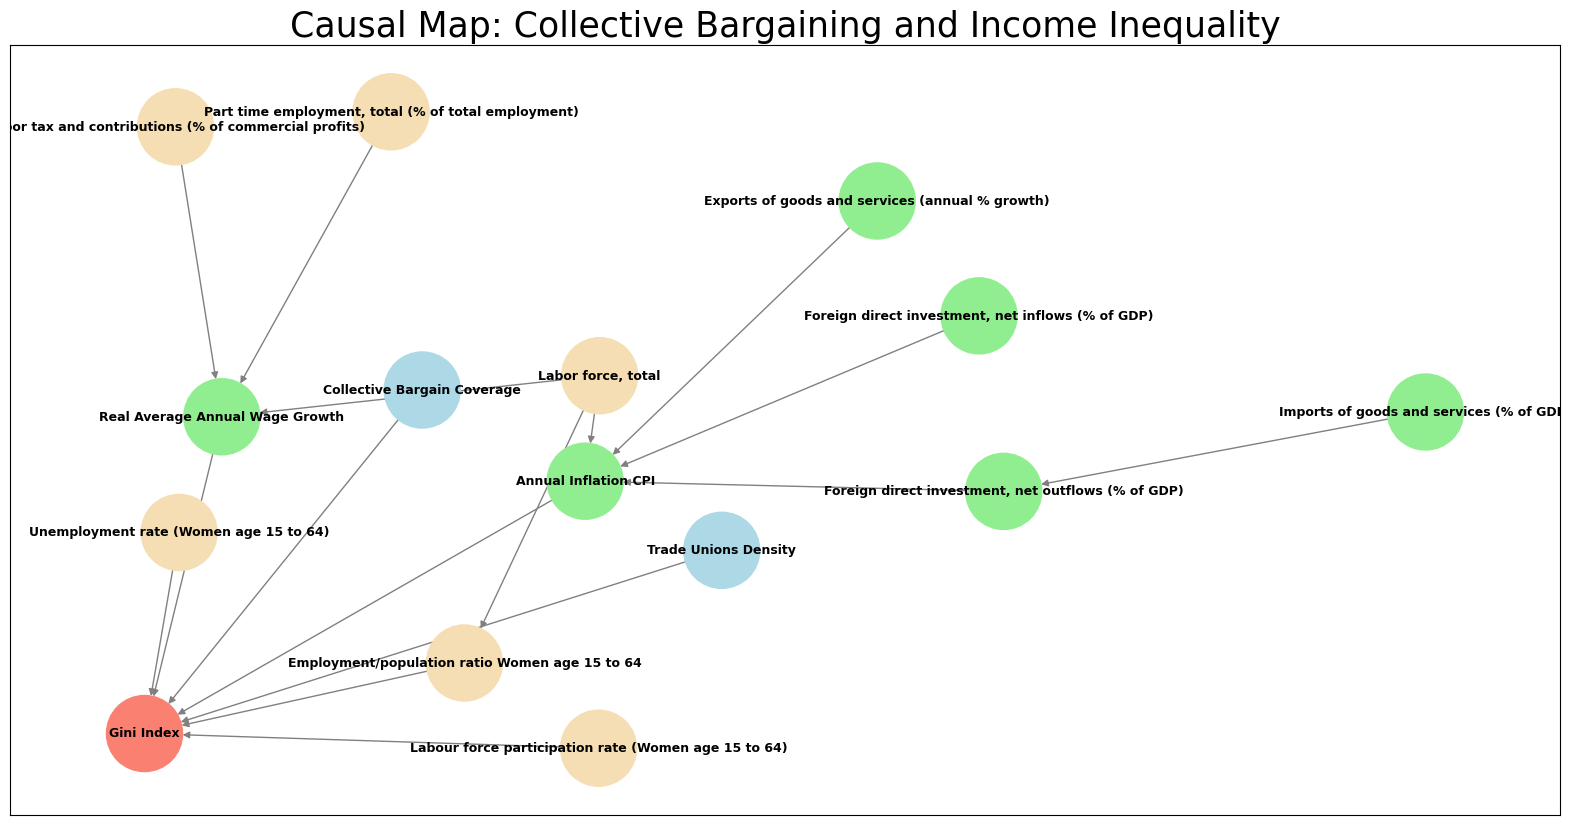

In [14]:
G = nx.DiGraph()

nodes_with_categories = {
    'Collective Bargain Coverage': 'Collective Bargaining',
    'Trade Unions Density': 'Collective Bargaining',
    'Gini Index': 'Income Inequality',
    'Real Average Annual Wage Growth': 'Economic',
    'Annual Inflation CPI': 'Economic',
    'Exports of goods and services (annual % growth)': 'Economic',
    'Foreign direct investment, net inflows (% of GDP)': 'Economic',
    'Foreign direct investment, net outflows (% of GDP)': 'Economic',
    'Imports of goods and services (% of GDP)': 'Economic',
    'Employment/population ratio Women age 15 to 64': 'Labor Market',
    'Labour force participation rate (Women age 15 to 64)': 'Labor Market',
    'Unemployment rate (Women age 15 to 64)': 'Labor Market',
    'Labor force, total': 'Labor Market',
    'Labor tax and contributions (% of commercial profits)': 'Labor Market',
    'Part time employment, total (% of total employment)': 'Labor Market'
}

for node in nodes_with_categories:
    G.add_node(node, category=nodes_with_categories[node])

edges = [
    ('Collective Bargain Coverage', 'Gini Index'),
    ('Trade Unions Density', 'Gini Index'),
    ('Real Average Annual Wage Growth', 'Gini Index'),
    ('Annual Inflation CPI', 'Gini Index'),
    ('Employment/population ratio Women age 15 to 64', 'Gini Index'),
    ('Labour force participation rate (Women age 15 to 64)', 'Gini Index'),
    ('Unemployment rate (Women age 15 to 64)', 'Gini Index'),
    ('Labor tax and contributions (% of commercial profits)', 'Real Average Annual Wage Growth'),
    ('Part time employment, total (% of total employment)', 'Real Average Annual Wage Growth'),
    ('Labor force, total', 'Real Average Annual Wage Growth'),
    ('Labor force, total', 'Annual Inflation CPI'),
    ('Labor force, total', 'Employment/population ratio Women age 15 to 64'),
    ('Exports of goods and services (annual % growth)', 'Annual Inflation CPI'),
    ('Foreign direct investment, net inflows (% of GDP)', 'Annual Inflation CPI'),
    ('Foreign direct investment, net outflows (% of GDP)', 'Annual Inflation CPI'),
    ('Imports of goods and services (% of GDP)', 'Foreign direct investment, net outflows (% of GDP)')
]

G.add_edges_from(edges)

color_map = {
    'Collective Bargaining': 'lightblue',
    'Income Inequality': 'salmon',
    'Economic': 'lightgreen',
    'Labor Market': 'wheat'
}
node_colors = [color_map[G.nodes[node]['category']] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=3000, font_weight='bold', font_size=9)
plt.title('Causal Map: Collective Bargaining and Income Inequality', size=25)
plt.show()


# Data Cleaning